In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('advertising.csv', delimiter=',')

In [3]:
print(df.head())

      TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9


In [4]:
y = df['Sales'].values
X = df.drop(['Sales'], axis=1).values
print(X)

[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]
 [  8.7  48.9  75. ]
 [ 57.5  32.8  23.5]
 [120.2  19.6  11.6]
 [  8.6   2.1   1. ]
 [199.8   2.6  21.2]
 [ 66.1   5.8  24.2]
 [214.7  24.    4. ]
 [ 23.8  35.1  65.9]
 [ 97.5   7.6   7.2]
 [204.1  32.9  46. ]
 [195.4  47.7  52.9]
 [ 67.8  36.6 114. ]
 [281.4  39.6  55.8]
 [ 69.2  20.5  18.3]
 [147.3  23.9  19.1]
 [218.4  27.7  53.4]
 [237.4   5.1  23.5]
 [ 13.2  15.9  49.6]
 [228.3  16.9  26.2]
 [ 62.3  12.6  18.3]
 [262.9   3.5  19.5]
 [142.9  29.3  12.6]
 [240.1  16.7  22.9]
 [248.8  27.1  22.9]
 [ 70.6  16.   40.8]
 [292.9  28.3  43.2]
 [112.9  17.4  38.6]
 [ 97.2   1.5  30. ]
 [265.6  20.    0.3]
 [ 95.7   1.4   7.4]
 [290.7   4.1   8.5]
 [266.9  43.8   5. ]
 [ 74.7  49.4  45.7]
 [ 43.1  26.7  35.1]
 [228.   37.7  32. ]
 [202.5  22.3  31.6]
 [177.   33.4  38.7]
 [293.6  27.7   1.8]
 [206.9   8.4  26.4]
 [ 25.1  25.7  43.3]
 [175.1  22.5  31.5]
 [ 89.7   9.9  35.7]
 [239.9  41.5

In [5]:
m = X.mean(axis=0)
so = X.std(axis=0)
X = (X - m) / so

print(X)

[[ 9.69852266e-01  9.81522472e-01  1.77894547e+00]
 [-1.19737623e+00  1.08280781e+00  6.69578760e-01]
 [-1.51615499e+00  1.52846331e+00  1.78354865e+00]
 [ 5.20496822e-02  1.21785493e+00  1.28640506e+00]
 [ 3.94182198e-01 -8.41613655e-01  1.28180188e+00]
 [-1.61540845e+00  1.73103399e+00  2.04592999e+00]
 [-1.04557682e+00  6.43904671e-01 -3.24708413e-01]
 [-3.13436589e-01 -2.47406325e-01 -8.72486994e-01]
 [-1.61657614e+00 -1.42906863e+00 -1.36042422e+00]
 [ 6.16042873e-01 -1.39530685e+00 -4.30581584e-01]
 [-9.45155670e-01 -1.17923146e+00 -2.92486143e-01]
 [ 7.90028350e-01  4.96973404e-02 -1.22232878e+00]
 [-1.43908760e+00  7.99208859e-01  1.62704048e+00]
 [-5.78501712e-01 -1.05768905e+00 -1.07502697e+00]
 [ 6.66253447e-01  6.50657027e-01  7.11007392e-01]
 [ 5.64664612e-01  1.65000572e+00  1.02862691e+00]
 [-9.25304978e-01  9.00494200e-01  3.84117072e+00]
 [ 1.56887609e+00  1.10306488e+00  1.16211917e+00]
 [-9.08957349e-01 -1.86635121e-01 -5.64073843e-01]
 [ 3.00679600e-03  4.29449843e-

In [6]:
X = np.hstack((np.ones((X.shape[0], 1)), X))

In [7]:
def mse(y_test, y_pred):
    return (sum(np.power(y_test - y_pred, 2)) / len(y))

In [8]:
def linear_prediction(X, w):
    return np.dot(X, w)

In [1]:
def stohastic_gradient_step(X, y, w, train_id, eta=0.01):
    grads = np.array([])
    for i in range(len(X[0])):
        g = (2 / X.shape[0]) * X[train_id][i] * (np.dot(w, X[train_id]) - y[train_id])
        grads = np.append(grads, g)
    return w - eta * grads

In [10]:
def euclidean_metrics(x,y): # способ 1
    d=0
    for i in range(len(x)):
        d+=(x[i]-y[i])**2
    return np.sqrt(d)

In [11]:
def stochastic_gradient_descent(X, y, w_init, eta=0.01, 
                                max_iter=1e4, 
                                min_weight_dist=1e-8,
                                seed=42, verbose=False):
    weight_dist = np.inf
    errors = []
    w = w_init
    np.random.seed(seed)
    it = 0
    last_weights = np.array([0 for x in range(len(w))])
    while weight_dist > min_weight_dist and it < max_iter:
        
        index = np.random.randint(X.shape[0])
        w = stohastic_gradient_step(X, y, w, index)
        
        if verbose:
            print(w)
        
        errors.append(mse(y, linear_prediction(X, w)))
        it += 1 
        
        weight_dist = euclidean_metrics(w, last_weights)
        last_weights = w
        
    return w, errors
        

In [12]:
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X, y, np.array([0, 0, 0, 0]), max_iter=100000)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

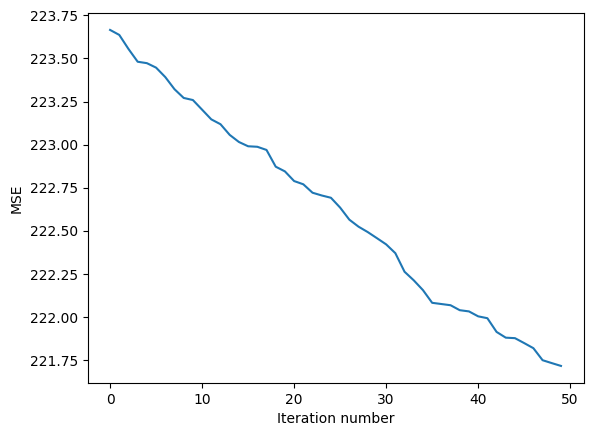

In [13]:
%pylab inline 
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

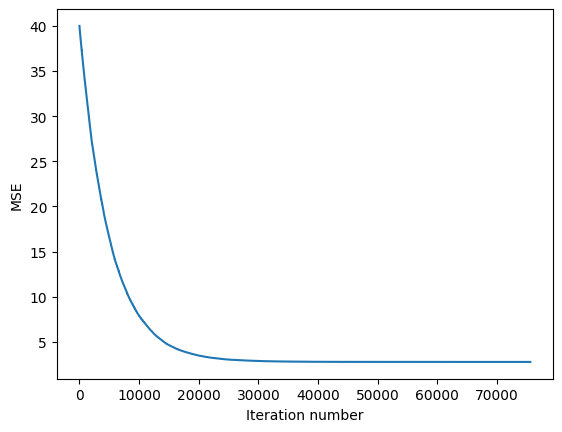

In [14]:
%pylab inline
er = np.array([x for x in stoch_errors_by_iter if x <= 40])
plot(range(len(er)), er)
xlabel('Iteration number')
ylabel('MSE')

In [15]:
stoch_grad_desc_weights

array([ 1.40190566e+01,  3.91069256e+00,  2.78209808e+00, -8.10462217e-03])

In [16]:
stoch_errors_by_iter[-1]

2.7844125884067044